In [1]:
import Pkg; Pkg.add(["Plots", "PyPlot"]);
import Logging; Logging.disable_logging(Logging.Info)

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/Project.toml`
  No Changes to `~/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/Manifest.toml`


LogLevel(1)

In [2]:
const STATIC_LECTURE = false;

In [3]:
using LinearAlgebra;
using Plots; default(l=5, size=(900,550), label=false);
using Printf;

BLAS.set_num_threads(1)

if STATIC_LECTURE
    default(fmt=:png)
end

prettyprint(a) = map(x -> @sprintf("%+.2f", x), a)
sciprint(a) = map(x -> @sprintf("%+.2e", x), a)

function imshow(x; kwargs...)
    return heatmap(x
        , aspect_ratio=:equal
        , framestyle=:none
        , yflip=true
        , c=cgrad(:diverging_gwv_55_95_c39_n256, rev=true)
        ; kwargs...
    )
end
bigspy(x; kwargs...) = spy(x, m=4, c=:diverging_gwv_55_95_c39_n256; kwargs...)
p = plot!([0,1],[0,1]);

# Eigenvalue Problems

**1. Review: Eigenvalues and Eigenvectors**

**2. The Eigenvalue Decomposition**

**3. Defective, Diagonalizable, and Normal Matrices**

**4. The Schur Decomposition**

## Eigenvalues and Eigenvectors: Review

Let $A \in \mathbb{C}^{m \times m}$ be a square matrix.  A nonzero vector $x \in \mathbb{C}^m$ is an **eigenvector** of $A$, and $\lambda \in \mathbb{C}$ is its corresponding **eigenvalue**, if

$$\Huge Ax = \lambda x.$$

- Recall from SVD uniqueness discussion: unique left and right _subspaces_ associated with each unique singular value $\sigma$

- An eigenvector is in an **eigenspace** $E_\lambda \subseteq C^m$ on which

$$ A x = \lambda x, \quad \text{for all }x\in E_{\lambda}.$$

### Spectrum $\Lambda(A)$

The set of all eigenvales of a matrix $A$ is the _spectrum_ of $A$,

$$\Large \mathbb{C} \supset \Lambda(A) = \{\lambda \in \mathbb{C}: Ax = \lambda x \text{ for some } x\neq 0 \in \mathbb{C}^m \}.$$

$$\Huge \underbrace{A x}_{\in \mathrm{range}(A)} = \underbrace{\lambda x}_{\in \mathrm{domain}(A)}$$

$$ \Rightarrow \mathrm{range}(A) = \mathrm{domain}(A) $$

$$ \Rightarrow A \in \mathbb{C}^{\boldsymbol{m \times m}} \quad [A \text{ must be square}]$$

### $\mathrm{range}(A) = \mathrm{domain}(A)$ must be true conceptually, too

**Example: polynomial interpolation**

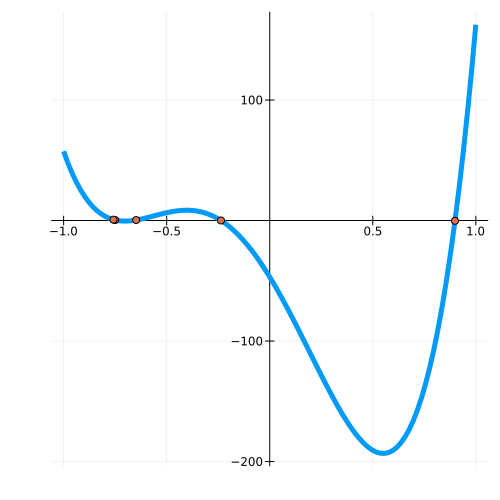

In [4]:
m = 5
x = rand(m)*2 .- 1 # locations
y = randn(m) # values
# vandermonde
V = [z^j for z in x, j in 0:(m-1)]
# coefficients
c = V \ y
poly(x) = foldl((s, α) -> (s*x + α), c[end:-1:1])
X = LinRange(-1,1,100)
Y = poly.(X)
p = plot(X, Y, framestyle=:origin, size=(500,500))
plot!(p, x, y, st=:scatter)

When fitting $m$ points with an $m-1$ degree polynomial, the Vandermonde matrix $V$,

$$v_{ij} = x_i^j,$$

is square, but the eigenvectors have no meaning.

### If $\mathrm{range}(A) = \mathrm{domain}(A)$ we can _iterate_ $A$

- Powers of $A$, 

$$\large A^k$$

- Related quantities, like the **matrix exponential**

$$\large e^{X} = \sum_{k=0}^\infty \frac{1}{k!}A^k.$$

### Physical significance: _resonant_ / _stable_ behavior in dynamical systems

#### Example: vibrating string

- At each point $x$ on the string, model its vertical displacement $z$

- The curvature of the string is approximately the second derivative $\partial_{xx} z$

- The more the string is curved, the faster it accelerates back to its rest position,

$$\large \partial_{tt} z = \partial_{xx} z$$

- Choose a vector of points $(x_1, \dots x_m)$ and model displacement with a vector

$$u = (u_1, \dots, u_m) \approx (z(x_1), \dots, z(x_m))$$

- Create a matrix $K \in \mathbb{C}^m$ that approximates second derivatives in $x$,

$$
\partial_{tt} z(x_i) \approx (K u)_i,
$$

so that

$$\large \partial_{tt} u = K u.$$

In [5]:
m = 40
modes = 10
h = 1 / (m + 1)
x = LinRange(-1, 1, m+2)
Δt = 0.5 * h

K = SymTridiagonal(-2*ones(m), ones(m-1)) / h / h
v = zeros(m)
z = min.( (1 .- x[2:end-1]) * 2, x[2:end-1] .+ 1)
ymax = maximum(abs.(z))
anim = Animation()
frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
for i in 1:1000
   z += Δt * v
   frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
   v += Δt * K * z
end
gif(anim, "rand-string.mp4", fps=30)

Plots.AnimatedGif("/Users/lzs/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/rand-string.mp4")

In [6]:
Λ, Z = eigen(Matrix(K)); # Λ[i] is ith eigenvalue, Z[:,i] is ith eigenvector

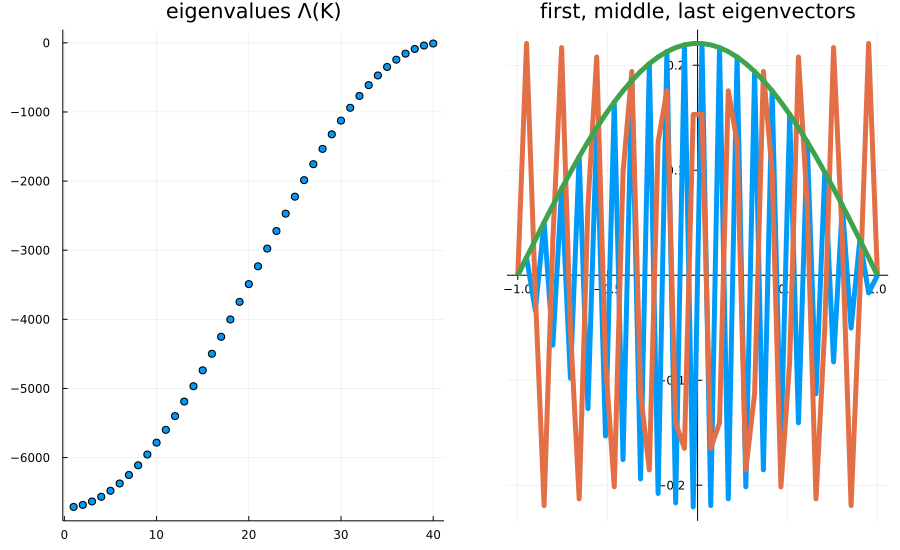

In [7]:
l_plot = plot(1:m, Λ, st=:scatter, title="eigenvalues Λ(K)")
z_plot = plot(x, [zeros(1,m); Z; zeros(1,m)][:,[1,div(m,2),m]], title="first, middle, last eigenvectors", framestyle=:origin)
plot(l_plot, z_plot)

In [8]:
z = Z[:,m]
v .= 0
ymax = maximum(abs.(z))
anim = Animation()
frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
for i in 1:1000
   z += Δt * v
   frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
   v += Δt * K * z
end
gif(anim, "string-mode-1.mp4", fps=30)

Plots.AnimatedGif("/Users/lzs/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/string-mode-1.mp4")

In [9]:
z = Z[:,m-1]
v .= 0
ymax = maximum(abs.(z))
anim = Animation()
frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
for i in 1:1000
   z += Δt * v
   frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
   v += Δt * K * z
end
gif(anim, "string-mode-2.mp4", fps=30)

Plots.AnimatedGif("/Users/lzs/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/string-mode-2.mp4")

In [10]:
z = Z[:,m-2]
v .= 0
ymax = maximum(abs.(z))
anim = Animation()
frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
for i in 1:1000
   z += Δt * v
   frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
   v += Δt * K * z
end
gif(anim, "string-mode-3.mp4", fps=30)

Plots.AnimatedGif("/Users/lzs/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/string-mode-3.mp4")

In [11]:
z = Z[:,m-3]
v .= 0
ymax = maximum(abs.(z))
anim = Animation()
frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
for i in 1:1000
   z += Δt * v
   frame(anim, plot(x, [0;z;0], xlim=(-1,1), ylim=(-ymax, ymax), framestyle=:origin))
   v += Δt * K * z
end
gif(anim, "string-mode-4.mp4", fps=30)

Plots.AnimatedGif("/Users/lzs/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/string-mode-4.mp4")

$$\large \partial_{tt} u = K u \quad \Rightarrow \quad \partial_{tt} (\alpha(t) z_i) = K (\alpha_i(t) z_i) = \lambda_i \alpha_i(t) z_i \quad \Rightarrow \quad \alpha_i''(t) = \lambda_k \alpha_i(t)$$

### Chladni figures

(This video: Exhibit made by Estes Objethos Atelier, video by Rodrigo Tetsuo Argenton)

In [12]:
import Base64

function showmp4(filename)
    open(filename) do f
        base64_video = Base64.base64encode(f)
        display("text/html", """<video controls src="data:video/x-m4v;base64,$base64_video">""")
    end
end


# showmp4("./Prato_de_Chladni_11.mp4")

showmp4 (generic function with 1 method)

## Eigenvalue Decomposition

An _eigenvalue decomposition_ of a square matrix $A$ is a factorization

$$\Large A = X \Lambda X^{-1},$$

where $X$ is nonsingular and $\Lambda$ is diagonal.

$$\large A = X \Lambda X^{-1} \quad \Leftrightarrow \quad A X = X \Lambda.$$

$$
\begin{bmatrix}
& & & & \\
& & & & \\
& & A & &  \\
& & & & \\
& & & & \\
\end{bmatrix}
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
x_1 & x_2 & \cdots & x_m \\
& & & \\
& & &
\end{array}
\right]
=
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
x_1 & x_2 & \cdots & x_m \\
& & & \\
& & &
\end{array}
\right]
\begin{bmatrix}
\lambda_1 & & & \\
& \lambda_2 & & \\
& & \ddots & \\
& & & \lambda_m
\end{bmatrix}
$$

$$
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
A x_1 & A x_2 & \cdots & A x_m \\
& & & \\
& & &
\end{array}
\right]
=
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\ x_1 \lambda_1 & x_2 \lambda_2 & \cdots & x_m \lambda_m \\
& & & \\
& & &
\end{array}
\right]
$$

> The eigenvalue decomposition expresses a change of basis to "eigenvector coordinates."

(Recall from lecture 1: $A^{-1} b$ is a change of basis, expansion of $b$ in the columns of $A$)

$$
\large
\begin{aligned}
Ax &= b \\
X \Lambda X^{-1} x &= b \\
\Lambda \underbrace{X^{-1} x}_{\tilde x} &= \underbrace{X^{-1} b}_{\tilde b} 
\end{aligned}
$$

- $\tilde x$: $x$ in eigenvector coordinates
- $\tilde b$: $b$ in eigenvector coordinates

### Geometric multiplicity

The set of vectors corresponding to a single eigenvalue $\lambda$, is an eigenspace $E_\lambda$, which is an **invariant subspace** of $A$,

$$A E_\lambda \subseteq E_{\lambda}.$$

The dimension of the subspace, $\dim(E_\lambda)$ (the maximum number of linearly independent eigenvectors with this eigenvalue), is the **geometric multiplicity** of $\lambda$.

$$\large\dim(E_\lambda) = \dim(\mathrm{null}(A - \lambda I)).$$

### Characteristic Polynomial

The _characteristic polynomial_ of $A \in \mathbb{C}^{m \times m}$, denoted $p_A$, is the degree $m$ polynomial defined by,

$$\large p_A(z) = \det(zI - A).$$

(Whatever $A$ is, the leading coefficient of $p_A(z)$ is 1: it is _monic_.)

### Eigenvalues $\Leftrightarrow$ roots of $p_A$

**T&B Theorem 24.1.** $\lambda$ is an eigenvalue of $A$ if and only if $p_A(\lambda) = 0.$

_Proof._

$\lambda$ is an eigenvalue of $A$ ...


$\Leftrightarrow$ there is a nonzero vector $x$ such that $\lambda x - Ax = 0$

$\Leftrightarrow$ $\lambda I - A$ is singular

$\Leftrightarrow$ $\det(\lambda I - A) = 0.$

### Consequence: complex eigenvalues

Even if a matrix is real, some of its eigenvalues may be complex.

**Example: particle in a flow field**

$$\partial_{t} x = Ax + b \quad \sim \quad x(t+ \Delta t) = (I + \Delta t A) x(t) + b$$

The eigenvalues describe the relationship of the flow to its one fixed point.

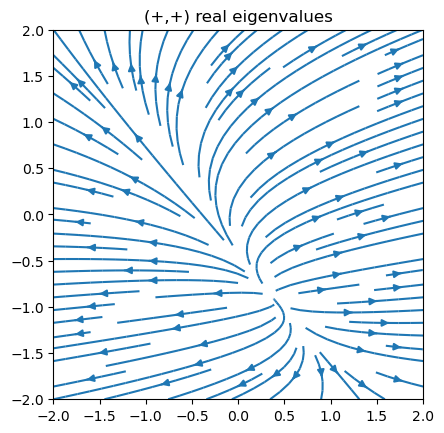

In [13]:
using PyPlot;

Λ = diagm([rand(), 1.5 + rand()])
X = randn(2,2)
A = X * Λ * inv(X)
b = A*(2*rand(2) .- 1)
m = 100
xs = LinRange(-2,2,m)
ys = LinRange(-2,2,m)
xxs = xs * ones(size(ys))'
yys = ones(size(xs)) * ys'
xys = [reshape(xxs,:) reshape(yys,:)]
uvs = A * xys' .+ b
U = reshape(uvs[1,:],size(xxs)...)
V = reshape(uvs[2,:],size(xxs)...)
PyPlot.streamplot(xxs', yys', U', V')
PyPlot.gcf().gca().set(aspect="equal", title="(+,+) real eigenvalues");

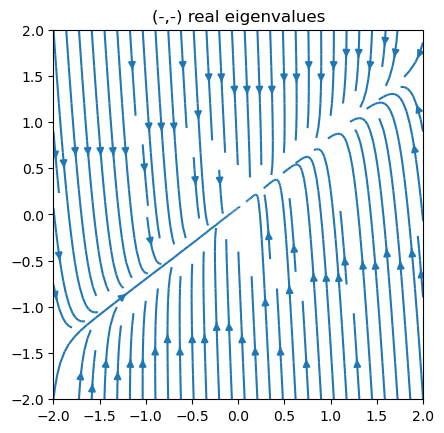

In [14]:
Λ = diagm(-[rand(), 1.5 + rand()])
X = randn(2,2)
A = X * Λ * inv(X)
b = A*(2*rand(2) .- 1)
m = 100
xs = LinRange(-2,2,m)
ys = LinRange(-2,2,m)
xxs = xs * ones(size(ys))'
yys = ones(size(xs)) * ys'
xys = [reshape(xxs,:) reshape(yys,:)]
uvs = A * xys' .+ b
U = reshape(uvs[1,:],size(xxs)...)
V = reshape(uvs[2,:],size(xxs)...)
PyPlot.streamplot(xxs', yys', U', V')
PyPlot.gcf().gca().set(aspect="equal", title="(-,-) real eigenvalues");

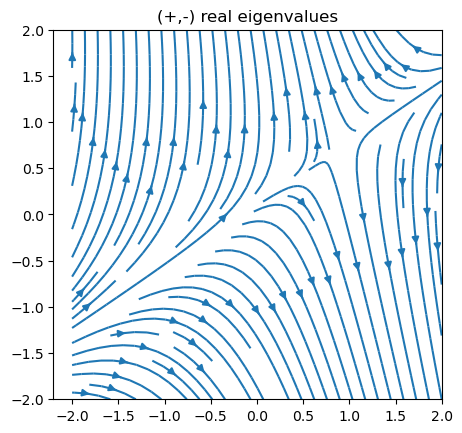

In [15]:
import PyPlot
Λ = diagm([rand(),-rand()])
X = randn(2,2)
A = X * Λ / X
b = A*(2*rand(2) .- 1)

m = 100
xs = LinRange(-2,2,m)
ys = LinRange(-2,2,m)

xxs = xs * ones(size(ys))'
yys = ones(size(xs)) * ys'

xys = [reshape(xxs,:) reshape(yys,:)]
uvs = A * xys' .+ b
U = reshape(uvs[1,:],size(xxs)...)
V = reshape(uvs[2,:],size(xxs)...)
PyPlot.streamplot(xxs', yys', U', V')
PyPlot.gcf().gca().set(aspect="equal", title="(+,-) real eigenvalues");

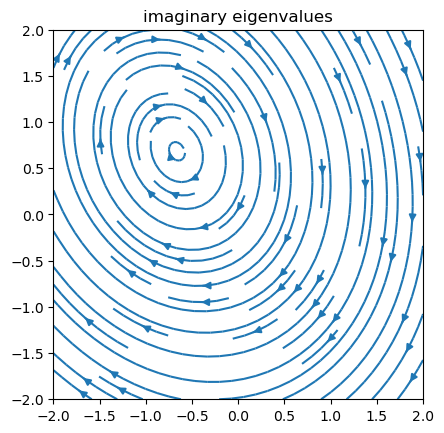

In [16]:
Λ = [[0, 1] [-1, 0]] * randn()
X = randn(2,2)
A = X * Λ * inv(X)
b = A*(2*rand(2) .- 1)
m = 100
xs = LinRange(-2,2,m)
ys = LinRange(-2,2,m)
xxs = xs * ones(size(ys))'
yys = ones(size(xs)) * ys'
xys = [reshape(xxs,:) reshape(yys,:)]
uvs = A * xys' .+ b
U = reshape(uvs[1,:],size(xxs)...)
V = reshape(uvs[2,:],size(xxs)...)
PyPlot.streamplot(xxs', yys', U', V')
PyPlot.gcf().gca().set(aspect="equal", title="imaginary eigenvalues");

### Algebraic multiplicity

By the fundamental theorem of algebra, there are $m$ (not necessarily distinct) complex numbers $(\lambda_1, \dots, \lambda_m)$ such that

$$
\large p_A(z) = (z - \lambda_1) (z - \lambda_2)\cdots(z - \lambda_m).
$$

By the previous theorem, each is an eigenvalue of $A$.

The _algebraic multiplicity_ of an eigenvalue is the number of times it appears as a root of $p_A$.

An eigenvalue is _simple_ if its algebraic multiplicity is 1.

**T&B Theorem 24.2.** $A$ has $m$ eigenvalues, _counted with algebraic multiplicity._

Geometric multiplicity $\neq$ algebraic multiplicity

### Geometric multiplicity $\leq$ algebraic multiplicity

**T&B Theorem 24.4.** The algebraic multiplicity of an eigenvalue $\lambda$ is at least as great as its geometric multiplicity.

_Proof._

Let $k$ be the geometric multiplicity of $\lambda$. Form a unitary matrix $V = [V_\lambda | V_\lambda^c]$, where $V_\lambda$ is an orthonormal basis of $E_\lambda$. 

$$ V^* A V = \begin{bmatrix} \lambda I_k & C \\ 0 & D \end{bmatrix}. $$

$$p_A(z) = \det(zI - A) = \det(zI - V^* A V) = \det((z - \lambda)I_k) \det(z I_{m-k} - D) = (z-\lambda)^k p_D(z).$$

Therefore $\lambda$ appears as a root of $p_A$ at least $k$ times.

## Defective and Diagonalizable Matrices

The flow fields we saw before had full geometric multiplicity.  They either had two fixed subspaces or circulated.  Here are flow fields with just one fixed subspace.

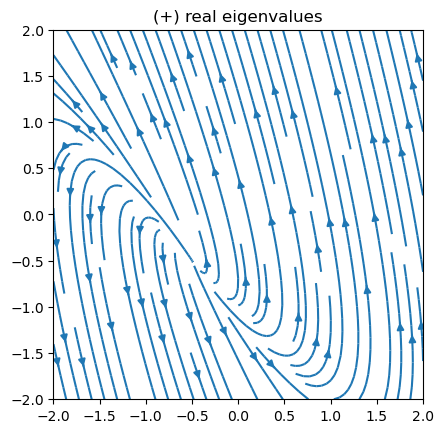

In [17]:
Λ = rand() * I + [[0,0] [1,0]]
X = randn(2,2)
A = X * Λ * inv(X)
b = A*(2*rand(2) .- 1)
m = 100
xs = LinRange(-2,2,m)
ys = LinRange(-2,2,m)
xxs = xs * ones(size(ys))'
yys = ones(size(xs)) * ys'
xys = [reshape(xxs,:) reshape(yys,:)]
uvs = A * xys' .+ b
U = reshape(uvs[1,:],size(xxs)...)
V = reshape(uvs[2,:],size(xxs)...)
PyPlot.streamplot(xxs', yys', U', V')
PyPlot.gcf().gca().set(aspect="equal", title="(+) real eigenvalues");

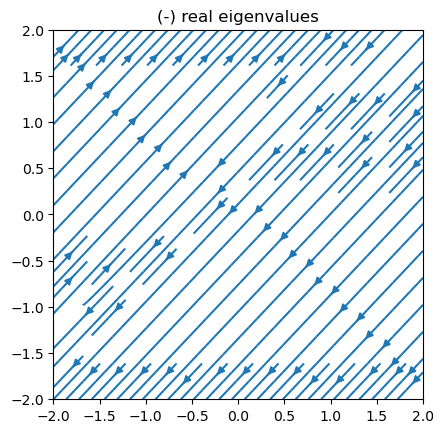

In [18]:
Λ = -rand() * I + [[0,0] [1,0]]
X = randn(2,2)
A = X * Λ * inv(X)
b = A*(2*rand(2) .- 1)
m = 100
xs = LinRange(-2,2,m)
ys = LinRange(-2,2,m)
xxs = xs * ones(size(ys))'
yys = ones(size(xs)) * ys'
xys = [reshape(xxs,:) reshape(yys,:)]
uvs = A * xys' .+ b
U = reshape(uvs[1,:],size(xxs)...)
V = reshape(uvs[2,:],size(xxs)...)
PyPlot.streamplot(xxs', yys', U', V')
PyPlot.gcf().gca().set(aspect="equal", title="(-) real eigenvalues");

Consider the matrices

$$
A = \begin{bmatrix} 2 & & \\ & 2 & \\ & & 2
\end{bmatrix}, \quad
B = \begin{bmatrix} 2 & 1 & \\ & 2 & 1 \\ & & 2
\end{bmatrix}.
$$

- same characteristic polynomial, $p_A(z) = p_B(z) = (z - 2)^3$ $\Rightarrow$ one eigenvalue $\lambda = 2$ with _algebraic_ multiplicity 3.

- All of $\mathbb{C}^3$ scales like $\lambda$ for $A$, so $E_\lambda^A = \mathbb{C}^3$ $\Rightarrow$ geometric multiplicity 3.

- Only $\mathrm{span}(e_1)$ is fixed by $B$, $E_\lambda^B = \mathrm{span}(e_1)$, $\Rightarrow$ geometric multiplicity 1.

### Defective eigenvalues, defective matrices

An eigenvalue whose algebraic multiplicity exceeds its geometric multiplicity is a _defective eigenvalue_.

A matrix that has one or more defective eigenvalues is a _defective matrix_.

$$
A = \begin{bmatrix} 2 & & \\ & 2 & \\ & & 2
\end{bmatrix}, \quad
B = \begin{bmatrix} 2 & 1 & \\ & 2 & 1 \\ & & 2
\end{bmatrix}.
$$

Our nondefective matrix $A$ is diagonal (every diagonal matrix is nondefective).  Can we find others?

**T&B Theorem 24.3.** If $X$ is nonsingular, then $X A X^{-1}$ has the same eigenvalues with the same geometric and algebraic multiplicities as $A$.

**Consequence 1:** There is no $X$ such that $B = X A X^{-1}$.

**Consequence 2:** Renaming $A = \Lambda$...

**T&B Theorem 24.5.** $A$ is nondefective $\Leftrightarrow$ $A$ has an eigenvalue decomposition $A = X \Lambda X^{-1}$.

$A$ is nondefective

$\Leftrightarrow$ $A$ has an eigenvalue decomposition $A = X \Lambda X^{-1}$

$\Leftrightarrow$ $A$ has a complete set of eigenvectors

$\Leftrightarrow$ $A$ has no defective eigenvalues (geometric multiplicity $=$ algebraic multiplicity)

$\Leftrightarrow$ $A$ is **diagonalizable**

### Exercise

**T&B Exercise 24.1.** True (why?) or false (counterexample).

(d) If $A$ is invertible, $\lambda \in \Lambda(A) \Leftrightarrow \lambda^{-1} \in \Lambda(A^{-1})$

**True**
$$A=X\Lambda X^{-1}\Leftrightarrow X\lambda^{-1}X^{-1}=A^{-1}\text{ if exists}$$
$$Ax=\lambda x\Leftrightarrow \lambda^{-1}x=A^{-1}x\text{ for all situations}$$


(e) $\Lambda(A) = \{0\} \Leftrightarrow A = 0.$

**False** for defective matrices. For example,

$$A=\begin{bmatrix}0&1\\0&0\end{bmatrix}$$

$$
\large
\begin{aligned}
Ax &= b \\
X \Lambda X^{-1} x &= b \\
\Lambda \underbrace{X^{-1} x}_{\tilde x} &= \underbrace{X^{-1} b}_{\tilde b} 
\end{aligned}
$$

Just because $A$ is diagonalizable $A = X \Lambda X^{-1}$ does not mean using eigenvector coordinates is a good idea: consider

$$\large \kappa(X).$$

### Unitary Diagonalization

If $\kappa(X) = 1$, $X$ is unitary, and the eigenvector basis is a well-conditioned basis.  A matrix is unitarily diagonalizable if it has such an eigenbasis $X$.

We have already seen one type of unitarily diagonalizable matrix (one whose $X$ columns / eigenvectors are orthogonal...)

- Hermitian matrices are unitarily diagonalizable.

### Unitarily Diagonalizable $\Leftrightarrow$ Normal

A matrix $A$ is a _normal matrix_ if it commutes with its adjoint,

$$\Large A^*A = AA^*.$$

**T&B Theorem 24.8.** A matrix is unitarily diagonalizable if and only if it is normal.

_Proof_ ($\Leftarrow$).

$$A A^* = U \Lambda U^* U \Lambda^* U^* = U \underbrace{\Lambda \Lambda^*}_{\text{diagonal}\Rightarrow\text{commute}} U^*$$

$$= U \Lambda^* \Lambda U^* = U \Lambda^* U^* U \Lambda U^* = A^* A$$

- This is a fairly special property: it does not happen by accident.

## Schur Factorization

The eigenvalue decomposition does not always exists and can be ill-conditioned.

We need a decomposition like the eigenvalue decomposition but with the nice properties of the SVD or QR as
the starting point for stable algorithms.

A **Schur factorization** of a matrix $A$ is a factorization

$$\Large A = QTQ^*,$$

where $Q$ is unitary and $T$ is upper-triangular.

**Claim:** The eigenvalues of $A$ appear on the diagonal of $T$.

You may have seen **Jordan normal form** ($A$ is similar to a matrix with eigenvalues on the diagonal and 0s or 1s above the diagonal, with 1s only next to repeated eigenvalues):

$$\begin{bmatrix}
& & & & \\
& & & & \\
& & A & & \\
& & & & \\
& & & &
\end{bmatrix} =
\begin{bmatrix}
& & & & \\
& & & & \\
& & Y & & \\
& & & & \\
& & & &
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & \{0,1\}& & & \\
& \lambda_1 & & & \\
& & \lambda_2 & & \\
& & & \ddots & \\
& & & & \lambda_m
\end{bmatrix}
\begin{bmatrix}
& & & & \\
& & & & \\
& & Y^{-1} & & \\
& & & & \\
& & & &
\end{bmatrix}
$$

We do not compute with Jordan normal form: the Schur factorization is a numerically stable equivalent factorization.

In [19]:
# Schur factorization of diagonalizable matrix
m = 4
X = randn(m,m)
schur(X * diagm(collect(1:m)) / X)

Schur{Float64, Matrix{Float64}}
T factor:
4×4 Matrix{Float64}:
 1.0  -0.815752  1.26989   142.046
 0.0   2.0       0.997722   91.1325
 0.0   0.0       4.0        44.5881
 0.0   0.0       0.0         3.0
Z factor:
4×4 Matrix{Float64}:
 -0.355897   0.79372   -0.493041   -0.0160056
  0.504723   0.268446   0.0412253   0.819446
 -0.459568  -0.525396  -0.529714    0.481829
 -0.63827    0.147999   0.688923    0.309989
eigenvalues:
4-element Vector{Float64}:
 0.9999999999997069
 2.0000000000002776
 3.9999999999999476
 3.000000000000077

In [20]:
# Schur factorization of defective matrix
V = Bidiagonal([1, 1, 2, 2], [1, 0, 0], :U)

4×4 Bidiagonal{Int64, Vector{Int64}}:
 1  1  ⋅  ⋅
 ⋅  1  0  ⋅
 ⋅  ⋅  2  0
 ⋅  ⋅  ⋅  2

In [21]:
schur(X * V / X)

Schur{Float64, Matrix{Float64}}
T factor:
4×4 Matrix{Float64}:
 1.0          -1.3279  0.54771   54.9646
 1.85407e-13   1.0     0.715581  68.8874
 0.0           0.0     2.0        3.18478e-13
 0.0           0.0     0.0        2.0
Z factor:
4×4 Matrix{Float64}:
 -0.355897  -0.79372    0.493089    0.0144544
  0.504723  -0.268446  -0.0438031  -0.819312
 -0.459568   0.525396   0.528195   -0.483493
 -0.63827   -0.147999  -0.689894   -0.30782
eigenvalues:
4-element Vector{ComplexF64}:
 0.9999999999999408 + 4.961876505726375e-7im
 0.9999999999999408 - 4.961876505726375e-7im
 1.9999999999999973 + 0.0im
 2.0000000000001212 + 0.0im

### Usage of the Schur factorization: eigenvectors from Schur decomposition?

In [22]:
T, Q, Λ = schur(X * V / X)

Schur{Float64, Matrix{Float64}}
T factor:
4×4 Matrix{Float64}:
 1.0          -1.3279  0.54771   54.9646
 1.85407e-13   1.0     0.715581  68.8874
 0.0           0.0     2.0        3.18478e-13
 0.0           0.0     0.0        2.0
Z factor:
4×4 Matrix{Float64}:
 -0.355897  -0.79372    0.493089    0.0144544
  0.504723  -0.268446  -0.0438031  -0.819312
 -0.459568   0.525396   0.528195   -0.483493
 -0.63827   -0.147999  -0.689894   -0.30782
eigenvalues:
4-element Vector{ComplexF64}:
 0.9999999999999408 + 4.961876505726375e-7im
 0.9999999999999408 - 4.961876505726375e-7im
 1.9999999999999973 + 0.0im
 2.0000000000001212 + 0.0im

In [23]:
### Eigenvectors of T for each λ?

Q, R, P = qr(T - Λ[1] * I, ColumnNorm())
diag(R)

4-element Vector{ComplexF64}:
     -88.13386813459952 + 0.0im
    -1.0380247119508352 + 0.0im
    -1.0000539392548413 + 0.0im
 1.6542719949078286e-24 + 0.0im

### Existence

**T&B Theorem 24.9.** Every square matrix $A$ has a Schur factorization.

_Proof._

Every eigenvalue $\lambda$ has at least one nonzero eigenvector, $v$ (can assume $\|v\|_2 = 1$).  Let $U = [v | V^c]$ be unitary.

$$
U^* A U = \begin{bmatrix} \lambda & B \\ 0 & C \end{bmatrix}
$$

(Inductive hypothesis)

$$\begin{bmatrix} \lambda & B \\ 0 & C \end{bmatrix}
=
\begin{bmatrix} \lambda & B \\ 0 & U_c T_c U_c^* \end{bmatrix}
=
\underbrace{\begin{bmatrix} 1 & \\ & U_c \end{bmatrix}}_Q
\begin{bmatrix} \lambda & B U_c \\ 0 & T_c \end{bmatrix}
\underbrace{\begin{bmatrix} 1 & \\ & U_c^* \end{bmatrix}}_{Q^*}
$$



### Summary

- $A = X \Lambda X^{-1}$ exists if and only if $A$ is nondefective
- $A = Q \Lambda Q^*$ exists if and only if $A$ is normal
- $A = Q T Q^*$ always exists

## Companion matrix

Given polynomial

$$p(z) = z^m + a_{m-1} z^{m-1} + \cdots + a_1 z + a_0,$$

Define the companion matrix

$$
C_p = \begin{bmatrix}
& & & & & a_0 \\
1 & & & & & a_1 \\
& 1 & & & & a_2 \\
& & 1 &  & & \vdots \\
& & & \ddots & & a_{m-2} \\
& & & & 1 & a_{m-1}
\end{bmatrix}$$

$$
zI - C_p = \begin{bmatrix}
z & & & & & -a_0 \\
-1 & z & & & & -a_1 \\
& -1 & z & & & -a_2 \\
& & -1 & \ddots & & \vdots \\
& & & \ddots & z & -a_{m-2} \\
& & & & -1 & z - a_{m-1}
\end{bmatrix}$$

**Claim.** $p_{C_p}(z) = p(z)$.

$\Rightarrow$ any eigenvalue computing algorithm can computes the roots of any polynomial.

(Galois, Abel) There is no algebraic method with finite steps of finding the roots of all polynomials with degree $\geq 5$.

**No eigenvalue algorithm (even in exact arithmetic) gives the exact solution in finite steps**

**Eigenvalue algorithms are _iterative_**